# Predictions based on first vector - v1

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


## Features:

* B365H
* B365D
* B365A

* buildUpPlaySpeed
* buildUpPlayPassing
* chanceCreationShooting
* defencePressure
* buildUpPlayDribbling
* chanceCreationPassing
* chanceCreationCrossing
* defenceAggression
* defenceTeamWidth


In [2]:
model_data = pd.read_csv('learning_vectors/v01/version01-bet365FIFA.csv', sep=',')
# model_data = model_data.set_index(['Match_id'])

# model_data = model_data.sort_values(['League_id', 'Date'])
# model_data.columns = ['League_id', 'Season', 'Stage', 'Date', 'H_team', 'A_team', 'Result',
#                       'B365H', 'B365D', 'B365A',
#                       'H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
#                       'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth']

print(model_data.shape)
# model_data.head()


(6080, 27)


In [3]:
#Check for nulls in data
model_data.isnull().sum()
print(model_data.isnull().any().any())


False


## Different algorithms comparison:

In [4]:
features = ['B365H', 'B365D', 'B365A',
            'H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
            'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth']

cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
scoring_type = 'accuracy'

f = open('results_v1.txt','w')

print(model_data[features].shape)
model_data[features].head()


(6080, 19)


,B365H,B365D,B365A,H_Speed,H_Pass,H_Shoot,H_Pressure,H_chPass,H_chCross,H_dAggr,H_dWidth,A_Speed,A_Pass,A_Shoot,A_Pressure,A_chPass,A_chCross,A_dAggr,A_dWidth
0,1.20,6.5,15.00,66,30,35,30,30,45,40,50,65,40,55,70,70,70,70,70
1,5.50,3.6,1.67,60,70,55,35,70,70,70,35,50,35,70,40,50,60,60,40
2,1.91,3.4,4.20,58,30,50,30,31,70,70,30,70,70,50,35,70,70,70,35
3,2.00,3.3,4.00,60,65,45,40,60,70,70,40,55,70,55,45,60,70,70,45
4,3.20,3.4,2.25,70,70,50,30,70,70,70,30,70,50,50,50,50,65,50,50


In [6]:
ALGS = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

def compare_algs(X, y, cross_validator, scoring_type, title="-- Other comparison --"):
    
    print (title)
    f.write(title+"\n")

    topic = "Algo: \tres.mean: \tres.std:"
    print (topic)
    f.write(topic+"\n")
    
    results = []
    names = []
    for name, model in ALGS:
        result = model_selection.cross_val_score(model, X, y,
                                              cv=cross_validator,
                                              scoring=scoring_type)
        results.append(result)
        names.append(name)
        info = "%s  \t%f \t(%f)" % (name, result.mean(), result.std())
        f.write(info+"\n")
        print(info)

    f.write("\n\n")

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()


### Basic comparison:

--- Basic comparison of algorithms  ---
Algo: 	res.mean: 	res.std:
LR  	0.539967 	(0.011207)
LDA  	0.538158 	(0.008960)
KNN  	0.458882 	(0.006250)
CART  	0.449671 	(0.015468)
NB  	0.451480 	(0.011455)
SVM  	0.466283 	(0.008989)


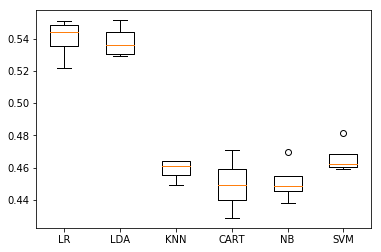

In [7]:
X = model_data[features]
y = model_data['Result']

title = "--- Basic comparison of algorithms  ---"

compare_algs(X, y, cross_validator, scoring_type, title)

### Basic comparison with preprocessing:

--- Basic comparison with preprocessing  ---
Algo: 	res.mean: 	res.std:
LR  	0.541447 	(0.013281)
LDA  	0.539638 	(0.008468)
KNN  	0.471711 	(0.011116)
CART  	0.431414 	(0.011698)
NB  	0.450329 	(0.019099)
SVM  	0.531250 	(0.011865)


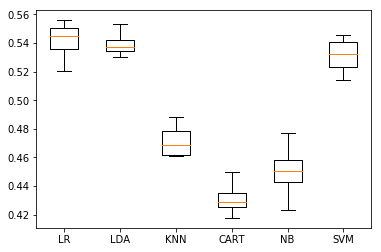

In [8]:
X = preprocessing.scale(model_data[features])
y = model_data['Result']

title = "--- Basic comparison with preprocessing  ---"

compare_algs(X, y, cross_validator, scoring_type, title)

## Other model comparisons:

-- Other comparison --
Algo: 	res.mean: 	res.std:
LR  	0.544901 	(0.007663)
LDA  	0.538816 	(0.011471)
KNN  	0.488322 	(0.006937)
CART  	0.494243 	(0.016769)
NB  	0.428618 	(0.015600)
SVM  	0.546382 	(0.009356)


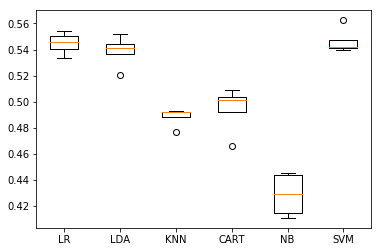

In [9]:
features_B365 = ['B365H', 'B365D', 'B365A']

X = model_data[features_B365]
y = model_data['Result']

compare_algs(X, y, cross_validator, scoring_type)

-- Other comparison --
Algo: 	res.mean: 	res.std:
LR  	0.483224 	(0.005688)
LDA  	0.484539 	(0.010470)
KNN  	0.468092 	(0.009074)
CART  	0.430263 	(0.007311)
NB  	0.474836 	(0.013177)
SVM  	0.467105 	(0.009304)


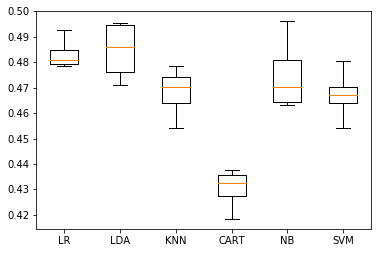

In [10]:
features_noB365 = ['H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
                   'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth']

X = model_data[features_noB365]
y = model_data['Result']

compare_algs(X, y, cross_validator, scoring_type)
